In [1]:
import sys
sys.path.append("..")

In [2]:
import default_config as cfg
import local_storage_config as storage_cfg

cfg.__dict__.update(storage_cfg.__dict__)

In [17]:
import dataset_functions
import models.six_stage_linear_model as model
import dataset_builder
import utils
import tensorflow as tf
import numpy as np
import visualizations as v
import matplotlib.pyplot as plt


In [4]:
model_ds=model.ModelDatasetComponent(cfg)
tfrecord_files_valid=dataset_builder.get_tfrecord_filenames(cfg.VALID_TFRECORDS,cfg)
tfrecord_files_valid.sort()
print("Found the following validation TFrecords:\n","\n".join(tfrecord_files_valid))
print("Building validation dataset")
dsv=dataset_builder.build_validation_ds(tfrecord_files_valid,model_ds.place_training_labels,cfg)
print("Validation dataset shape:",dsv)

Retrieving TFrecords from: C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords/validation
Found the following validation TFrecords:
 C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\validation-001.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\validation-002.tfrecords
Building validation dataset
Validation dataset shape: <PrefetchDataset shapes: (((None, 368, 368, 3), (None, 46, 46, 1)), ((None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 19), (None, 46, 46, 19))), types: ((tf.float32, tf.float32), (tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32))>


In [95]:
it=iter(dsv)
st=next(it)

In [70]:
import loss_metrics as lm
import importlib
importlib.reload(lm)

<module 'loss_metrics' from 'C:\\Users\\flash\\Project\\Yet-Another-Openpose-Implmentation\\loss_metrics.py'>

In [96]:
kpts=st[1][5][0]
true=kpts[...,0:1]

noise_p=np.random.random(true.shape)
noise_p=np.cast(noise_p,np.float32)
zero_p=np.zeros_like(true)
full_p=true
half_p=true*0.5
double_p=true*2
wrong_p=kpts[...,12:13]

TypeError: '_typedict' object is not callable

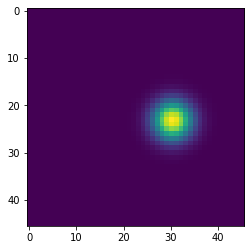

In [91]:
plt.imshow(wrong_p[...,0])


In [97]:
AR=lm.AnalogRecall()
AR(true,noise_p)


TypeError: in converted code:

    C:\Users\flash\Project\Yet-Another-Openpose-Implmentation\loss_metrics.py:20 update_state  *
        err=bounded_true-bounded_pred
    c:\program files\python36-64\lib\site-packages\tensorflow_core\python\ops\math_ops.py:899 binary_op_wrapper
        return func(x, y, name=name)
    c:\program files\python36-64\lib\site-packages\tensorflow_core\python\ops\gen_math_ops.py:11087 sub
        "Sub", x=x, y=y, name=name)
    c:\program files\python36-64\lib\site-packages\tensorflow_core\python\framework\op_def_library.py:563 _apply_op_helper
        inferred_from[input_arg.type_attr]))

    TypeError: Input 'y' of 'Sub' Op has type float64 that does not match type float32 of argument 'x'.


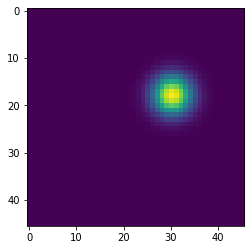

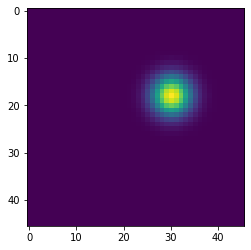

In [50]:
plt.imshow(true[...,0])

